In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
runs = pd.read_csv("data/runs.csv")
races = pd.read_csv("data/races.csv")
pd.options.display.max_columns = None

In [3]:
runs.shape

(79447, 37)

In [4]:
races.shape

(6349, 37)

In [5]:
runs.head(15)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
5,0,6,3296,3,0.0,1.25,3,NZ,Gelding,60,--,1114.0,127,5,11,11,5,3.0,NaN,NaN,5.00,7.75,1.25,1.25,NaN,NaN,14.33,22.03,22.90,23.57,NaN,NaN,82.83,7.0,1.8,54,34
6,0,7,911,12,0.0,9.50,3,NZ,Gelding,60,--,978.0,123,11,1,1,1,12.0,NaN,NaN,0.75,1.00,0.75,9.50,NaN,NaN,13.53,21.59,23.94,25.09,NaN,NaN,84.15,99.0,28.0,55,149
7,0,8,2170,1,1.0,0.00,3,AUS,Gelding,60,--,1170.0,128,2,9,9,10,1.0,NaN,NaN,3.75,5.50,3.25,0.75,NaN,NaN,14.13,21.87,23.58,23.06,NaN,NaN,82.64,12.0,3.6,47,183
8,0,9,1730,13,0.0,9.75,3,NZ,Gelding,60,--,1126.0,123,6,2,3,3,13.0,NaN,NaN,0.75,1.50,1.25,9.75,NaN,NaN,13.65,21.71,23.90,24.94,NaN,NaN,84.20,38.0,13.0,75,131
9,0,10,2998,14,0.0,999.00,3,AUS,Mare,60,--,1072.0,125,9,14,14,14,14.0,NaN,NaN,9.50,14.00,16.75,999.00,NaN,NaN,15.05,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145


In [6]:
runs = runs.drop('lengths_behind', axis = 1)
runs = runs.drop('horse_gear', axis = 1)
runs = runs.drop('position_sec1', axis = 1)
runs = runs.drop('position_sec2', axis = 1)
runs = runs.drop('position_sec3', axis = 1)
runs = runs.drop('position_sec4', axis = 1)
runs = runs.drop('position_sec5', axis = 1)
runs = runs.drop('position_sec6', axis = 1)
runs = runs.drop('behind_sec1', axis = 1)
runs = runs.drop('behind_sec2', axis = 1)
runs = runs.drop('behind_sec3', axis = 1)
runs = runs.drop('behind_sec4', axis = 1)
runs = runs.drop('behind_sec5', axis = 1)
runs = runs.drop('behind_sec6', axis = 1)
runs = runs.drop('time1', axis = 1)
runs = runs.drop('time2', axis = 1)
runs = runs.drop('time3', axis = 1)
runs = runs.drop('time4', axis = 1)
runs = runs.drop('time5', axis = 1)
runs = runs.drop('time6', axis = 1)
runs = runs.drop('won', axis = 1)

In [7]:
runs.head(15)

,race_id,horse_no,horse_id,result,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,3,AUS,Gelding,60,1020.0,133,7,83.92,9.7,3.7,118,2
1,0,2,2157,8,3,NZ,Gelding,60,980.0,133,12,83.56,16.0,4.9,164,57
2,0,3,858,7,3,NZ,Gelding,60,1082.0,132,8,83.40,3.5,1.5,137,18
3,0,4,1853,9,3,SAF,Gelding,60,1118.0,127,13,83.62,39.0,11.0,80,59
4,0,5,2796,6,3,GB,Gelding,60,972.0,131,14,83.24,50.0,14.0,9,154
5,0,6,3296,3,3,NZ,Gelding,60,1114.0,127,5,82.83,7.0,1.8,54,34
6,0,7,911,12,3,NZ,Gelding,60,978.0,123,11,84.15,99.0,28.0,55,149
7,0,8,2170,1,3,AUS,Gelding,60,1170.0,128,2,82.64,12.0,3.6,47,183
8,0,9,1730,13,3,NZ,Gelding,60,1126.0,123,6,84.20,38.0,13.0,75,131
9,0,10,2998,14,3,AUS,Mare,60,1072.0,125,9,92.20,39.0,12.0,109,145


In [8]:
races.head()

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1,time2,time3,time4,time5,time6,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,NaN,NaN,NaN,NaN,24.05,46.69,70.39,NaN,NaN,NaN,NaN,5,13,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,4,13.77,22.22,24.88,22.82,NaN,NaN,NaN,13.77,35.99,60.87,83.69,NaN,NaN,NaN,11,1,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,1,24.33,22.47,22.09,NaN,NaN,NaN,NaN,24.33,46.80,68.89,NaN,NaN,NaN,NaN,5,3,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,4,25.45,23.52,23.31,23.56,NaN,NaN,NaN,25.45,48.97,72.28,95.84,NaN,NaN,NaN,2,10,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN


In [9]:
merged_df = pd.merge(runs, races[['race_id', 'venue', 'config', 'surface', 'distance', 'going']], on = 'race_id', how = 'left')

In [10]:
merged_df.head()

,race_id,horse_no,horse_id,result,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,venue,config,surface,distance,going
0,0,1,3917,10,3,AUS,Gelding,60,1020.0,133,7,83.92,9.7,3.7,118,2,ST,A,0,1400,GOOD TO FIRM
1,0,2,2157,8,3,NZ,Gelding,60,980.0,133,12,83.56,16.0,4.9,164,57,ST,A,0,1400,GOOD TO FIRM
2,0,3,858,7,3,NZ,Gelding,60,1082.0,132,8,83.40,3.5,1.5,137,18,ST,A,0,1400,GOOD TO FIRM
3,0,4,1853,9,3,SAF,Gelding,60,1118.0,127,13,83.62,39.0,11.0,80,59,ST,A,0,1400,GOOD TO FIRM
4,0,5,2796,6,3,GB,Gelding,60,972.0,131,14,83.24,50.0,14.0,9,154,ST,A,0,1400,GOOD TO FIRM


Getting the percentage of each horse getting first in races

In [11]:
win_count = merged_df.groupby('horse_id')['result'].apply(lambda x: (x == 1).sum())
total_count = merged_df.groupby('horse_id')['result'].count()
win_percentage = (win_count / total_count) * 100

horse_win_percentage_df = win_percentage.to_frame().reset_index()
horse_win_percentage_df.columns = ['horse_id', 'horse_win_percentage']
merged_df = merged_df.merge(horse_win_percentage_df, on = 'horse_id')

Getting the percentage of each horse placing at least 3rd in the races

In [12]:
place_count = merged_df.groupby('horse_id')['result'].apply(lambda x: (x <= 3).sum())
total_count = merged_df.groupby('horse_id')['result'].count()
horse_place_percentage = (place_count / total_count) * 100

horse_place_percentage_df = horse_place_percentage.to_frame().reset_index()
horse_place_percentage_df.columns = ['horse_id', 'horse_place_percentage']
merged_df = merged_df.merge(horse_place_percentage_df, on = 'horse_id')

Getting the percentage of each jockey getting first in races

In [13]:
win_count = merged_df.groupby('jockey_id')['result'].apply(lambda x: (x == 1).sum())
total_count = merged_df.groupby('jockey_id')['result'].count()
jockey_win_percentage = (win_count / total_count) * 100

jockey_win_percentage = jockey_win_percentage.to_frame().reset_index()
jockey_win_percentage.columns = ['jockey_id', 'jockey_win_percentage']
merged_df = merged_df.merge(jockey_win_percentage, on = 'jockey_id')

Getting the percentage of each jockey placing at least 3rd in races

In [14]:
win_count = merged_df.groupby('jockey_id')['result'].apply(lambda x: (x <= 3).sum())
total_count = merged_df.groupby('jockey_id')['result'].count()
jockey_place_percentage = (win_count / total_count) * 100

jockey_place_percentage = jockey_place_percentage.to_frame().reset_index()
jockey_place_percentage.columns = ['jockey_id', 'jockey_place_percentage']
merged_df = merged_df.merge(jockey_place_percentage, on = 'jockey_id')

Getting the percentage of each trainer getting first

In [15]:
win_count = merged_df.groupby('trainer_id')['result'].apply(lambda x: (x == 1).sum())
total_count = merged_df.groupby('trainer_id')['result'].count()
trainer_win_percentage = (win_count / total_count) * 100

trainer_win_percentage = trainer_win_percentage.to_frame().reset_index()
trainer_win_percentage.columns = ['trainer_id', 'trainer_win_percentage']
merged_df = merged_df.merge(trainer_win_percentage, on = 'trainer_id')

Getting the percentage of each trainer placing at least 3rd in races

In [16]:
win_count = merged_df.groupby('trainer_id')['result'].apply(lambda x: (x <= 3).sum())
total_count = merged_df.groupby('trainer_id')['result'].count()
trainer_place_percentage = (win_count / total_count) * 100

trainer_place_percentage = trainer_place_percentage.to_frame().reset_index()
trainer_place_percentage.columns = ['trainer_id', 'trainer_place_percentage']
merged_df = merged_df.merge(trainer_place_percentage, on = 'trainer_id')

In [17]:
merged_df = merged_df.sort_values(by = ['race_id'], ascending=True)
merged_df.head(14)

,race_id,horse_no,horse_id,result,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,finish_time,win_odds,place_odds,trainer_id,jockey_id,venue,config,surface,distance,going,horse_win_percentage,horse_place_percentage,jockey_win_percentage,jockey_place_percentage,trainer_win_percentage,trainer_place_percentage
0,0,1,3917,10,3,AUS,Gelding,60,1020.0,133,7,83.92,9.7,3.7,118,2,ST,A,0,1400,GOOD TO FIRM,6.666667,20.000000,14.981988,38.376775,14.084507,35.706834
21061,0,9,1730,13,3,NZ,Gelding,60,1126.0,123,6,84.20,38.0,13.0,75,131,ST,A,0,1400,GOOD TO FIRM,4.545455,22.727273,2.777778,12.037037,7.645260,23.438183
75335,0,2,2157,8,3,NZ,Gelding,60,980.0,133,12,83.56,16.0,4.9,164,57,ST,A,0,1400,GOOD TO FIRM,6.250000,18.750000,8.874802,26.888537,8.313476,25.046333
56076,0,4,1853,9,3,SAF,Gelding,60,1118.0,127,13,83.62,39.0,11.0,80,59,ST,A,0,1400,GOOD TO FIRM,0.000000,12.500000,9.090909,25.818182,8.430692,26.365646
27715,0,6,3296,3,3,NZ,Gelding,60,1114.0,127,5,82.83,7.0,1.8,54,34,ST,A,0,1400,GOOD TO FIRM,12.500000,25.000000,4.623955,16.350975,6.945797,22.005842
9387,0,8,2170,1,3,AUS,Gelding,60,1170.0,128,2,82.64,12.0,3.6,47,183,ST,A,0,1400,GOOD TO FIRM,10.526316,21.052632,10.975610,24.796748,6.804998,22.311468
16652,0,13,727,11,3,USA,Gelding,60,1089.0,120,1,83.94,5.4,1.7,128,138,ST,A,0,1400,GOOD TO FIRM,13.043478,26.086957,8.356290,26.385063,5.123898,17.765645
48527,0,7,911,12,3,NZ,Gelding,60,978.0,123,11,84.15,99.0,28.0,55,149,ST,A,0,1400,GOOD TO FIRM,12.500000,25.000000,2.414487,9.295775,7.028754,20.894569
69818,0,10,2998,14,3,AUS,Mare,60,1072.0,125,9,92.20,39.0,12.0,109,145,ST,A,0,1400,GOOD TO FIRM,0.000000,0.000000,4.891304,18.750000,4.755784,19.023136
64987,0,3,858,7,3,NZ,Gelding,60,1082.0,132,8,83.40,3.5,1.5,137,18,ST,A,0,1400,GOOD TO FIRM,9.090909,13.636364,12.421581,34.328733,9.769994,27.094324


Changed the values of venue, horse country, and horse type

In [18]:
cat_cols = ['venue', 'horse_country', 'horse_type', 'config', 'going']
for col in cat_cols:
    merged_df[col] = pd.factorize(merged_df[col])[0]

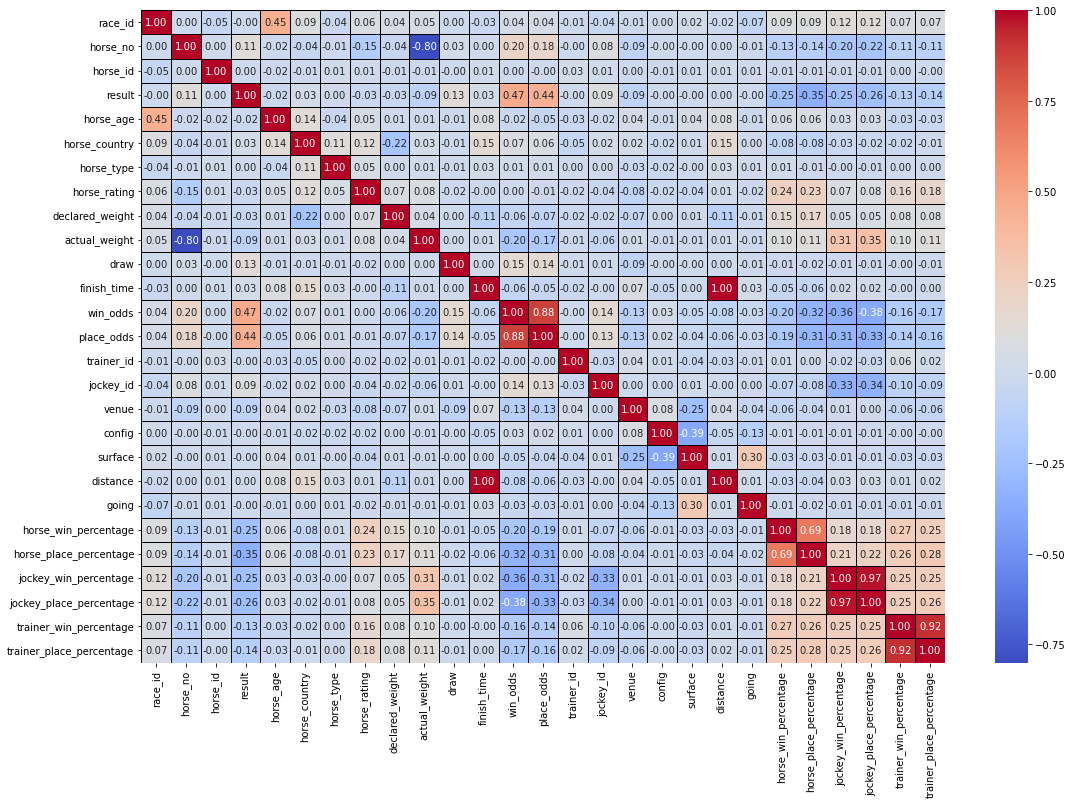

In [28]:
fig, ax = plt.subplots(figsize = (18, 12))

corr_matrix = merged_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', linewidths = 1, linecolor = 'black', annot = True, fmt = ".2f", ax = ax)


plt.show()

In [32]:
merged_df.isna().sum()

race_id                     0
horse_no                    0
horse_id                    0
result                      0
horse_age                   0
horse_country               0
horse_type                  0
horse_rating                0
declared_weight             0
actual_weight               0
draw                        0
finish_time                 0
win_odds                    0
place_odds                  0
trainer_id                  0
jockey_id                   0
venue                       0
config                      0
surface                     0
distance                    0
going                       0
horse_win_percentage        0
horse_place_percentage      0
jockey_win_percentage       0
jockey_place_percentage     0
trainer_win_percentage      0
trainer_place_percentage    0
dtype: int64

Drop missing values

In [33]:
merged_df = merged_df.dropna()

Standerdize the data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Separate the dependent variable
X = merged_df[merged_df.columns[1:]] 
X = merged_df.drop(['finish_time'], axis = 1)
X_scaled = ss.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

y = merged_df['finish_time']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size = 0.2, random_state = 42)

In [35]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (60569, 26)
y_train (60569,)
X_test (15143, 26)
y_test (15143,)


In [36]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

lr = linear_model.LinearRegression()
cv = cross_val_score(lr,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.99707175 0.99715252 0.99610944 0.99713269 0.99737561]
0.9969684011966319


In [37]:
lr.fit(X_train, y_train)

# Predict target variable on the test data
lr_y_pred = lr.predict(X_test)

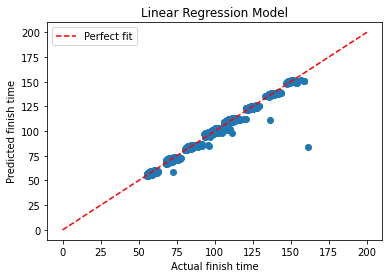

In [38]:
# Plot predicted values against actual values
plt.scatter(y_test, lr_y_pred)
plt.plot([0, 200], [0, 200], '--', color = 'r', label = 'Perfect fit')
plt.xlabel('Actual finish time')
plt.ylabel('Predicted finish time')
plt.title('Linear Regression Model')
plt.legend(loc = 'best')
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 4)
cv = cross_val_score(knn,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.82068778 0.81867072 0.81406898 0.81816332 0.82118649]
0.8185554572629103


In [40]:
knn.fit(X_train, y_train)

# Predict target variable on the test data
knn_y_pred = knn.predict(X_test)

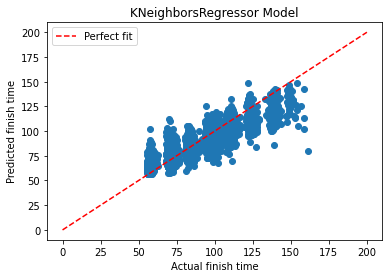

In [41]:
# Plot predicted values against actual values
plt.scatter(y_test, knn_y_pred)
plt.plot([0, 200], [0, 200], '--', color = 'r', label = 'Perfect fit')
plt.xlabel('Actual finish time')
plt.ylabel('Predicted finish time')
plt.title('KNeighborsRegressor Model')
plt.legend(loc = 'best')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv = 5)
print(cv)
print(cv.mean())

[0.99801125 0.99798974 0.99703459 0.99791624 0.99818928]
0.9978282202016073


In [43]:
rf.fit(X_train,y_train)
y_rf_predict = rf.predict(X_test)

In [44]:
len(y_rf_predict)

15143

In [45]:
len(merged_df)

75712

In [46]:
merged_df['prediction'] = rf.predict(X_scaled_df)

In [62]:
cols_to_keep = ['race_id', 'horse_id', 'finish_time', 'result', 'prediction']
subset_df = merged_df[cols_to_keep]
subset_df = subset_df.iloc[14:28]
subset_df['predicted_rank'] = subset_df['prediction'].rank(ascending = True).astype(int)
subset_df

,race_id,horse_id,finish_time,result,prediction,predicted_rank
69820,1,2772,70.76,4,70.6378,5
4996,1,2330,70.80,5,70.6478,7
67212,1,2813,70.81,6,70.6444,6
22554,1,2814,70.98,8,70.8507,8
18488,1,4181,71.47,10,71.2229,10
26326,1,3605,70.56,2,70.2604,2
8325,1,2397,71.98,12,71.9865,12
15035,1,550,72.54,13,72.1884,13
9,1,3915,70.39,1,70.2184,1
27721,1,3865,71.77,11,71.6279,11


In [61]:
subset_df2 = merged_df[cols_to_keep]
subset_df2 = subset_df2.head(14)
subset_df2['predicted_rank'] = subset_df2['prediction'].rank(ascending = True).astype(int)
subset_df2

,race_id,finish_time,result,prediction,predicted_rank
0,0,83.92,10,83.7965,10
21061,0,84.20,13,84.3818,13
75335,0,83.56,8,83.4783,8
56076,0,83.62,9,83.6011,9
27715,0,82.83,3,83.2213,4
9387,0,82.64,1,82.7390,1
16652,0,83.94,11,83.8296,11
48527,0,84.15,12,84.1054,12
69818,0,92.20,14,90.3528,14
64987,0,83.40,7,83.4154,6


In [81]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print("Random Forest results:")
print("R^2:", metrics.r2_score(y_test,y_rf_predict))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_rf_predict))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_rf_predict))
print("Root Mean Squared Error:",np.square(metrics.mean_squared_error(y_test,y_rf_predict)))

Random Forest results:
R^2: 0.997070701505391
Mean Absolute Error: 0.5313468533315723
Mean Squared Error: 1.002546340048868
Root Mean Squared Error: 1.0050991639453803


R-squared (R²) value of 0.997: This indicates that the model explains 99.7% of the variance in the target variable, which is very high. This means that the model is able to fit the data very well, and is likely a good fit for the problem.

Mean Absolute Error (MAE) value of 0.531: This represents the average absolute difference between the predicted and actual values. A lower MAE value indicates better performance, so this result is promising.

Mean Squared Error (MSE) value of 1.002: This represents the average squared difference between the predicted and actual values. MSE penalizes large errors more than MAE, and is in the squared unit of the target variable. A lower MSE value indicates better performance, so this result is also promising.

Root Mean Squared Error (RMSE) value of 1.005: This is the square root of the MSE value, and represents the standard deviation of the residuals. RMSE is in the same unit as the target variable, which makes it easy to interpret. A lower RMSE value indicates better performance, so this result is also promising.